In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv(r'C:\Users\matte\OneDrive\Desktop\GitHub\data\Airbnb\listings_cleaned.csv')
df.head()

,id,name,price,room_type,number_of_reviews,stars,bed,bedroom,bath,neighbourhood,latitude,longitude,minimum_nights,last_review,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count,host_id,days_online
0,23986,Rental unit in Milan · ★4.64 · 1 bedroom · 1 b...,150.0,Entire home/apt,26.0,4.64,1.0,1.0,1.0,NAVIGLI,45.44806,9.17373,1.0,2023-07-29,0.18,4.0,1.0,95941,4261.0
1,40470,Rental unit in Milan · ★4.67 · 2 bedrooms · 4 ...,80.0,Entire home/apt,41.0,4.67,4.0,2.0,1.0,VIALE MONZA,45.52023,9.22747,3.0,2023-09-09,0.26,3.0,2.0,174203,4752.0
2,304050,Rental unit in Milan · ★4.91 · 1 bedroom · 1 b...,49.0,Private room,264.0,4.91,1.0,1.0,1.0,XXII MARZO,45.45709,9.21531,2.0,2023-11-21,1.92,33.0,2.0,1566887,4124.0
3,46536,Rental unit in Milan · ★4.53 · 2 bedrooms · 3 ...,110.0,Entire home/apt,35.0,4.53,3.0,2.0,1.0,VIALE MONZA,45.52276,9.22478,3.0,2023-10-30,0.24,5.0,1.0,138683,4402.0
4,333223,Rental unit in Milano · ★5.0 · 1 bedroom · 2 b...,150.0,Private room,3.0,5.00,2.0,1.0,1.0,MAGENTA - S. VITTORE,45.46097,9.16431,1.0,2023-04-19,0.02,1.0,5.0,1697947,4260.0


### Handling outliers

#### Reviews Number

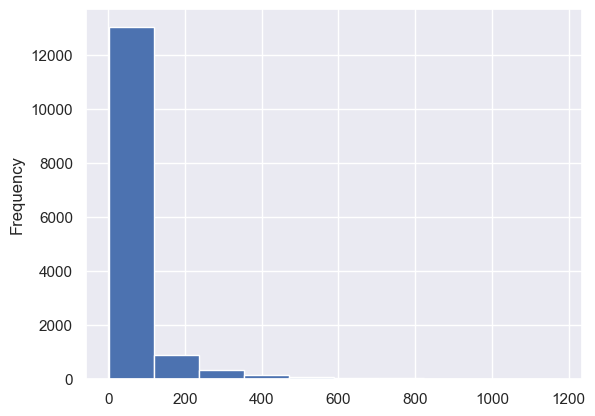

In [3]:
df['number_of_reviews'].plot.hist();

In [4]:
def outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    print(f'Low-Band Outlier: {q1-1.5*iqr}')
    print(f'High-Band Outlier: {q3+1.5*iqr}')
    print('------')
    print(f'Low-Band Extreme Outlier: {q1-3*iqr}')
    print(f'High-Band Extreme Outlier: {q3+3*iqr}')

outliers(df['number_of_reviews'])

Low-Band Outlier: -59.5
High-Band Outlier: 112.5
------
Low-Band Extreme Outlier: -124.0
High-Band Extreme Outlier: 177.0


In [5]:
df.loc[df['number_of_reviews_ltm']>4, 'id'].count()

9332

In [6]:
# I keep just the listings with at least 5 reviews
# in the past 12 months

df = df[df['number_of_reviews_ltm']>4]

#### Price

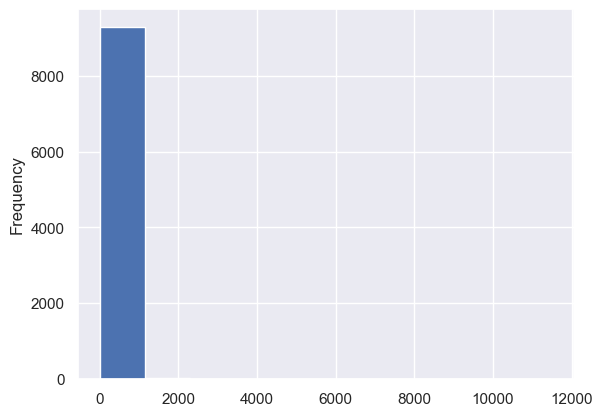

In [7]:
df['price'].plot.hist();

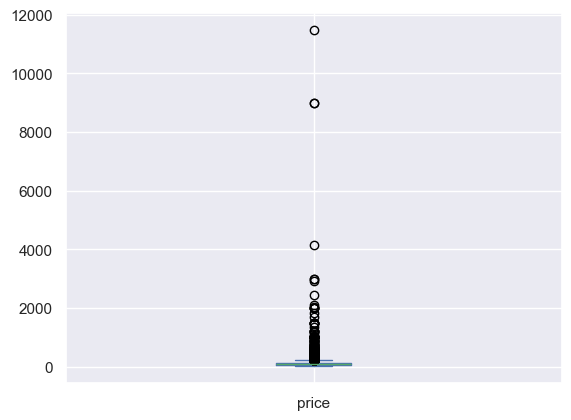

In [8]:
df['price'].plot.box();

In [9]:
outliers(df['price'])

Low-Band Outlier: -17.5
High-Band Outlier: 218.5
------
Low-Band Extreme Outlier: -106.0
High-Band Extreme Outlier: 307.0


In [10]:
# There are no listings that cost too little

df[df['price']<10]['id'].count()

0

In [11]:
# How many rows I'm deleting

df[df['price']>219]['id'].count()

712

In [12]:
# Exlude the outliers

df = df[df['price'] < 219]

In [13]:
# No null col, nice!

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8615 entries, 2 to 14490
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8615 non-null   int64  
 1   name                            8615 non-null   object 
 2   price                           8615 non-null   float64
 3   room_type                       8615 non-null   object 
 4   number_of_reviews               8615 non-null   float64
 5   stars                           8615 non-null   float64
 6   bed                             8615 non-null   float64
 7   bedroom                         8615 non-null   float64
 8   bath                            8615 non-null   float64
 9   neighbourhood                   8615 non-null   object 
 10  latitude                        8615 non-null   float64
 11  longitude                       8615 non-null   float64
 12  minimum_nights                  8615 n

### Bed

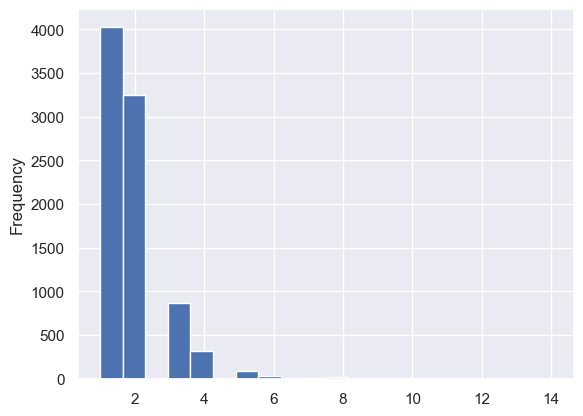

In [14]:
df['bed'].plot.hist(bins=20);

In [15]:
outliers(df['bed'])

Low-Band Outlier: -0.5
High-Band Outlier: 3.5
------
Low-Band Extreme Outlier: -2.0
High-Band Extreme Outlier: 5.0


In [16]:
df[df['bed']>4]['id'].count()

155

In [17]:
df = df[df['bed']<5]

### Bath

Low-Band Outlier: 1.0
High-Band Outlier: 1.0
------
Low-Band Extreme Outlier: 1.0
High-Band Extreme Outlier: 1.0


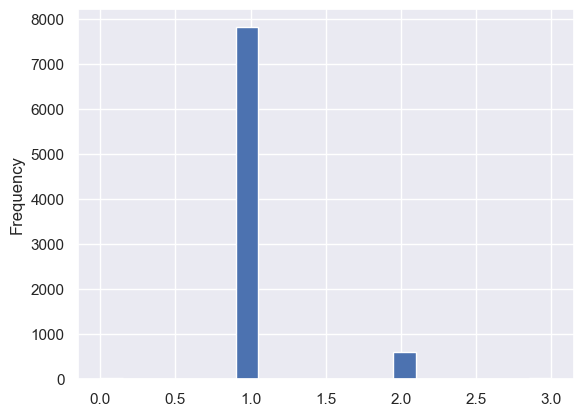

In [18]:
outliers(df['bath'])
df['bath'].plot.hist(bins=20);

In [19]:
# I've decided to keep all the bath values.
# It's not rare for a home to have 2 baths

(df['bath'] > 1).value_counts()

bath
False    7841
True      619
Name: count, dtype: int64

### Bedroom

Low-Band Outlier: 1.0
High-Band Outlier: 1.0
------
Low-Band Extreme Outlier: 1.0
High-Band Extreme Outlier: 1.0


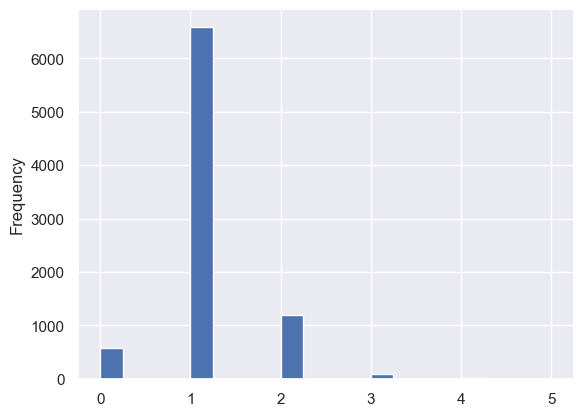

In [20]:
outliers(df['bedroom'])
df['bedroom'].plot.hist(bins=20);

### Data exploration

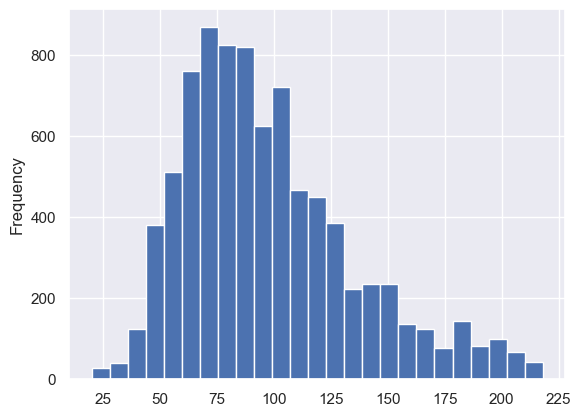

In [21]:
df['price'].plot.hist(bins=25);

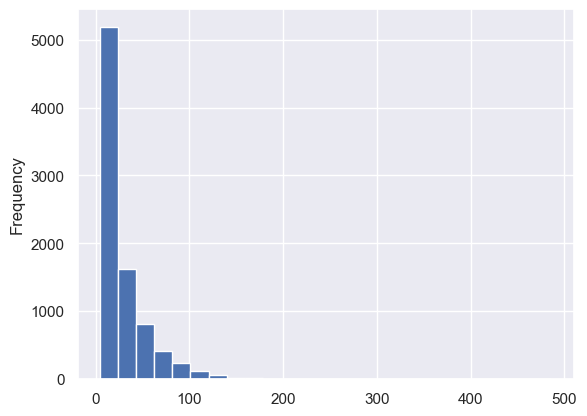

In [22]:
df['number_of_reviews_ltm'].plot.hist(bins=25);

In [23]:
df['minimum_nights'].value_counts()

minimum_nights
1.0      3774
2.0      3383
3.0       801
4.0       224
5.0       116
7.0        40
6.0        37
30.0       17
15.0       13
10.0       11
28.0       10
14.0        8
20.0        5
12.0        4
29.0        4
21.0        3
8.0         3
35.0        1
45.0        1
25.0        1
44.0        1
9.0         1
365.0       1
120.0       1
Name: count, dtype: int64

In [24]:
df = df[df['minimum_nights']<6]

## Revenue in the last 12 Months

There's no enough data to get the true revenue of the last 12 months. But we can get a proxy with this formula:

*4.2 * number_of_reviews_ltm * price*

The average number of nights per Airbnb booking in "Europe, Middle East, and Africa" in 2022 is 4.2.

[Source](https://www.statista.com/statistics/1193597/airbnb-average-nights-per-booking-by-region-worldwide/)

This is the best proxy based on the available data.

In [25]:
df['multiply'] = 4.2
df.loc[df['minimum_nights']==5, 'multiply'] = 5

In [26]:
df['revenue_ltm'] = df['multiply'] * df['number_of_reviews_ltm'] * df['price']

df.head()

,id,name,price,room_type,number_of_reviews,stars,bed,bedroom,bath,neighbourhood,...,longitude,minimum_nights,last_review,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count,host_id,days_online,multiply,revenue_ltm
2,304050,Rental unit in Milan · ★4.91 · 1 bedroom · 1 b...,49.0,Private room,264.0,4.91,1.0,1.0,1.0,XXII MARZO,...,9.215310,2.0,2023-11-21,1.92,33.0,2.0,1566887,4124.0,4.2,6791.4
3,46536,Rental unit in Milan · ★4.53 · 2 bedrooms · 3 ...,110.0,Entire home/apt,35.0,4.53,3.0,2.0,1.0,VIALE MONZA,...,9.224780,3.0,2023-10-30,0.24,5.0,1.0,138683,4402.0,4.2,2310.0
9,84741,Loft in Milan · ★4.63 · 1 bedroom · 1 bed · 1 ...,39.0,Private room,569.0,4.63,1.0,1.0,1.0,PARCO FORLANINI - ORTICA,...,9.244106,1.0,2023-12-18,3.71,52.0,2.0,443989,4610.0,4.2,8517.6
11,348448,Rental unit in Milan · ★4.54 · Studio · 1 bed ...,99.0,Entire home/apt,137.0,4.54,1.0,0.0,1.0,BRERA,...,9.188730,1.0,2023-11-26,1.00,38.0,1.0,326090,4130.0,4.2,15800.4
12,90830,Loft in Milan · ★4.67 · 2 bedrooms · 3 beds · ...,91.0,Entire home/apt,186.0,4.67,3.0,2.0,1.0,NAVIGLI,...,9.163470,1.0,2023-11-27,1.20,67.0,22.0,181255620,4635.0,4.2,25607.4


### One-Hot Encoding

In [27]:
df['room_type'].value_counts()

room_type
Entire home/apt    7298
Private room        958
Shared room          41
Hotel room            1
Name: count, dtype: int64

In [28]:
# Drop the occurrences of Hotel room and Shared room

df = df[(df['room_type'] != 'Hotel room')&(df['room_type'] != 'Shared room')]

In [29]:
# Entire home/apt = 1
# Private room = 0

df['room'] = 1
df.loc[df['room_type']=='Private room','room'] = 0

#### Delete the 'neighbourhood' with too few occurrences

In [30]:
neigh_count = df['neighbourhood'].value_counts()
neigh_count[5:10]

neighbourhood
NAVIGLI       363
TICINESE      344
BRERA         319
ISOLA         305
XXII MARZO    225
Name: count, dtype: int64

In [31]:
# Check to see how many columns I'm deleting

print(neigh_count[neigh_count<50].count())
print(neigh_count[neigh_count>50].count())

38
43


In [32]:
neigh_count = neigh_count[neigh_count>50]

# I delete the listings that aren't in our considered neighbourhoods
df = df[df['neighbourhood'].isin(neigh_count.index.to_list())]

In [33]:
# One hot encoding 'neighbourhood'

df = pd.concat([df,
           pd.get_dummies(df['neighbourhood'], dtype='float64')],
           axis='columns')

### Linear Regression

In [34]:
# This is the neig I'll delete to avoid Multicollinearity

neigh_count.index.to_list()[-1]

'LAMBRATE'

In [35]:
# I delete the last one-hot encoded to avoid Multicollinearity

neig_to_keep = neigh_count.index.to_list()[:-1]

col_to_keep = ['price','stars','bed','bedroom','days_online',
               'bath','room','minimum_nights'] + neig_to_keep

# I'm shuffling the dataframe... otherwise, when I do cross_val_score
# I can't be that sure that the model see all the neighbourhood
df = df.sample(frac=1).reset_index(drop=True)

X = df[col_to_keep]
y = df['revenue_ltm']

In [36]:
# I try to fit the PolyFeatures just to 'price'
# It's normal that after a poin, increasing the price will decrease the revenue

from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

poly = PolynomialFeatures(degree=2)

X_price2 = X.copy()
X_price2['price'] = poly.fit_transform(X_price2[['price']])

X_scaled = X.copy()
X_scaled[['price', 'days_online']] = scaler.fit_transform(X_scaled[['price', 'days_online']])

lr = LinearRegression()

print('Price squared: ', cross_val_score(lr,X_price2,y, cv=5, scoring='r2'))
print('Standardized: ', cross_val_score(lr,X_scaled,y, cv=5, scoring='r2'))
print('Normal: ', cross_val_score(lr,X,y, cv=5, scoring='r2'))
print()
print('Price squared: ', cross_val_score(lr,X_price2,y, cv=5, scoring='r2').mean())
print('Standardized: ',cross_val_score(lr,X_scaled,y, cv=5, scoring='r2').mean())
print('Normal: ', cross_val_score(lr,X,y, cv=5, scoring='r2').mean())

Price squared:  [0.16684627 0.18812756 0.18348523 0.16227078 0.20837683]
Standardized:  [0.17466569 0.20400591 0.19366393 0.17446451 0.22536664]
Normal:  [0.17466569 0.20400591 0.19366393 0.17446451 0.22536664]

Price squared:  0.18182133414386792
Standardized:  0.19443333682513872
Normal:  0.1944333368251536


#### Use all data to train the model
**Normal linear regression works better**

In [37]:
lm = LinearRegression()
lm.fit(X,y)

yhat = lm.predict(X)
print('R2: ', metrics.r2_score(y, yhat))
print('MSE: ', metrics.mean_squared_error(y, yhat))

R2:  0.20646165382300763
MSE:  104165491.36447458


c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

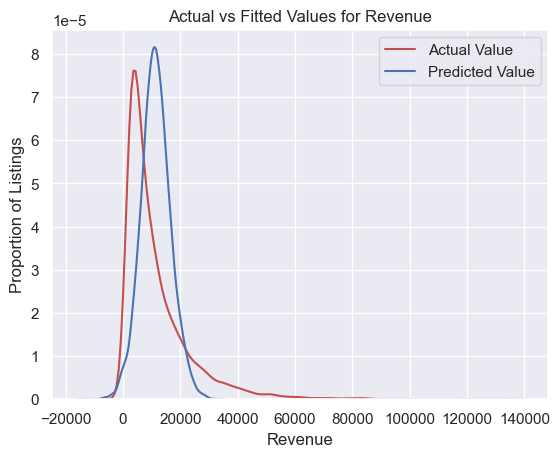

In [38]:
ax1 = sns.kdeplot(y, color="r", label="Actual Value")
sns.kdeplot(yhat, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Revenue')
plt.xlabel('Revenue')
plt.ylabel('Proportion of Listings')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()


In [39]:
coefficients = lm.coef_

coefficients_dict = dict(zip(col_to_keep, coefficients))

df_coeff = pd.DataFrame(coefficients_dict, index=['coefficients']).T
df_coeff.sort_values(ascending=False, by='coefficients')

,coefficients
DUOMO,10340.996439
stars,8181.612190
CENTRALE,7052.485400
BRERA,6270.148865
TICINESE,5571.165587
MAGENTA - S. VITTORE,5409.948499
PAGANO,5226.895024
BUENOS AIRES - VENEZIA,4812.470166
MACIACHINI - MAGGIOLINA,4515.581686
NAVIGLI,4246.898963


### ANOVA test

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.float_format', '{:.6f}'.format)

#### Which of the neig really influence revenue

In [41]:
df_stats = pd.concat([X[neig_to_keep],y], axis='columns')

In [42]:
# deleting the special characters in the columns
# because stats models doesn't like them

import re

pattern = r'[\w]*'

for col in df_stats.columns.to_list():
    new_col = re.findall(pattern, col)[0]
    df_stats.rename(columns={col:new_col}, inplace=True)

In [43]:
# Creating the stats models' model

formula = f'revenue_ltm ~ C({df_stats.columns.to_list()[0]})'

for col in df_stats.columns.to_list()[1:-1]:
    formula += f' + C({col})'

model = ols(formula, df_stats).fit()

print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)

res.head()

Overall model F( 42, 7505) =  15.506, p =  0.0000


,sum_sq,df,F,PR(>F)
C(BUENOS),1831215574.258338,1.000000,15.074467,0.000104
C(DUOMO),7764041015.342996,1.000000,63.913162,0.000000
C(CENTRALE),3337302958.061556,1.000000,27.472496,0.000000
C(SARPI),1057014641.462507,1.000000,8.701287,0.003190
C(LORETO),361243234.870064,1.000000,2.973735,0.084667


In [44]:
res[res['PR(>F)'] > 0.05]

,sum_sq,df,F,PR(>F)
C(LORETO),361243234.870064,1.000000,2.973735,0.084667
C(CITTA),27458103.425638,1.000000,0.226034,0.634494
C(TORTONA),85251682.447323,1.000000,0.701787,0.402210
C(DE),346494844.999241,1.000000,2.852327,0.091283
C(BANDE),75963534.092944,1.000000,0.625328,0.429099
C(GIAMBELLINO),33996443.311565,1.000000,0.279857,0.596811
C(LODI),150655451.222462,1.000000,1.240187,0.265471
C(VILLAPIZZONE),22643289.554839,1.000000,0.186398,0.665944
C(PADOVA),780777.426717,1.000000,0.006427,0.936104
C(WASHINGTON),284236697.792902,1.000000,2.339821,0.126146


In [45]:
# Find all the neig witha a p value <0.05
# and store them into bad_neigh

pattern = r'C\(([\w]*)'

bad_neigh = res[res['PR(>F)'] > 0.05].index.str.findall(pattern).str.get(0).to_list()

In [46]:
# I had to delete the special characters to fit stats model
# Now I re-put the special characters so it's easier for me

pattern = r'[\w]*'

coeff_comparing = df_coeff[7:].sort_values(ascending=False, by='coefficients').copy()
coeff_comparing['name'] = coeff_comparing.index.str.findall(pattern).str.get(0)
coeff_comparing.head()

,coefficients,name
DUOMO,10340.996439,DUOMO
CENTRALE,7052.485400,CENTRALE
BRERA,6270.148865,BRERA
TICINESE,5571.165587,TICINESE
MAGENTA - S. VITTORE,5409.948499,MAGENTA


In [47]:
# We can see a pretty clear threshold. After 'VIGENTINA' the
# neighborhood is significant.

coeff_comparing['name'].isin(bad_neigh)

DUOMO                      False
CENTRALE                   False
BRERA                      False
TICINESE                   False
MAGENTA - S. VITTORE       False
PAGANO                     False
BUENOS AIRES - VENEZIA     False
MACIACHINI - MAGGIOLINA    False
NAVIGLI                    False
GUASTALLA                  False
GARIBALDI REPUBBLICA       False
SARPI                      False
XXII MARZO                 False
S. CRISTOFORO               True
SELINUNTE                  False
LORETO                      True
ISOLA                      False
VIALE MONZA                False
LODI - CORVETTO             True
GHISOLFA                    True
PORTA ROMANA               False
VIGENTINA                  False
DE ANGELI - MONTE ROSA      True
BOVISA                      True
NIGUARDA - CA' GRANDA       True
GIAMBELLINO                 True
AFFORI                      True
GALLARATESE                 True
BANDE NERE                  True
DERGANO                     True
WASHINGTON

In [48]:
good_neig = coeff_comparing[~coeff_comparing['name'].isin(bad_neigh)].index.to_list()
good_neig

['DUOMO',
 'CENTRALE',
 'BRERA',
 'TICINESE',
 'MAGENTA - S. VITTORE',
 'PAGANO',
 'BUENOS AIRES - VENEZIA',
 'MACIACHINI - MAGGIOLINA',
 'NAVIGLI',
 'GUASTALLA',
 'GARIBALDI REPUBBLICA',
 'SARPI',
 'XXII MARZO',
 'SELINUNTE',
 'ISOLA',
 'VIALE MONZA',
 'PORTA ROMANA',
 'VIGENTINA',
 'minimum_nights']

In [49]:
# I don't know why minimum_nights ended up in good_neig
# I delete it

try:
    good_neig.remove('minimum_nights')
except:
    print('No minimum_nights')

# 'LAMBADE' is the neig deleted to avoid Multicollinearity
good_neig = good_neig + ['LAMBADE']

In [50]:
good_neig

['DUOMO',
 'CENTRALE',
 'BRERA',
 'TICINESE',
 'MAGENTA - S. VITTORE',
 'PAGANO',
 'BUENOS AIRES - VENEZIA',
 'MACIACHINI - MAGGIOLINA',
 'NAVIGLI',
 'GUASTALLA',
 'GARIBALDI REPUBBLICA',
 'SARPI',
 'XXII MARZO',
 'SELINUNTE',
 'ISOLA',
 'VIALE MONZA',
 'PORTA ROMANA',
 'VIGENTINA',
 'LAMBADE']

### Retrain the model using only the significant neig

In [51]:
# Create df2. A dataframe that has only neigborhoods that
# really influence revenue.

df2 = df[df['neighbourhood'].isin(good_neig)].copy()

In [52]:
to_predict = 'revenue_ltm'

# I deleted bedroom because it was correlated with beds.
# That's to avoid multicollinearity

num_col_to_keep = ['price','stars','bed','days_online',
                 'bath','minimum_nights','room']

cat_col_to_keep = good_neig[:-1]
col_to_keep2 = num_col_to_keep + cat_col_to_keep 

X2 = df[col_to_keep2].copy()
X2 = sm.add_constant(X2)
y2 = df[to_predict].copy()

In [53]:
# rename the columns
pattern = r'[\w_]*'

for col in X2.columns.to_list():
    new_col = re.findall(pattern=pattern, string=col)
    new_col = ''.join(new_col)
    X2.rename(columns={col:new_col}, inplace=True)

In [54]:
formula = f'{to_predict} ~ {X2.columns.to_list()[0]}'

for col in X2.columns.to_list()[1:]:
    if X2[col].max()==1:
        formula += f' + C({col})'
    else:
        formula += f' + {col}'


model = ols(formula, pd.concat([X2,y2], axis='columns')).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            revenue_ltm   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     76.12
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:55:14   Log-Likelihood:                -80405.
No. Observations:                7548   AIC:                         1.609e+05
Df Residuals:                    7522   BIC:                         1.610e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -1.858e+04   1144.502    -16.236      0.000   -2.08e+04   -1.63e+04
C(room)[T.1]                    2501.3229    411.534      6.078      0.000    1694.601    3308.045
C(DUOMO)[T.1.0]                 8740.9427    544.346     16.058      0.000    7673.873    9808.012
C(CENTRALE)[T.1.0]              5527.4723    532.859     10.373      0.000    4482.920    6572.024
C(BRERA)[T.1.0]                 4667.9481    629.895      7.411      0.000    3433.178    5902.718
C(TICINESE)[T.1.0]              4070.4376    589.779      6.902      0.000    2914.306    5226.570
C(MAGENTASVITTORE)[T.1.0]       3785.3261    851.574      4.445      0.000    2116.003    5454.649
C(PAGANO)[T.1.0]                3748.0962   1173.524      3.194      0.001    1447.662    6048.531
C(BUENOSAIRESVENEZIA)[T.1.0]    3291.0870    442.480      7.438      0.000    2423.703    4158.471
C(MACIACHINIMAGGIOLINA)[T.1.0]  3093.3879    904.425      3.420      0.001    1320.462    4866.314
C(NAVIGLI)[T.1.0]               2719.7503    576.325      4.719      0.000    1589.993    3849.508
C(GUASTALLA)[T.1.0]             2537.5276    875.063      2.900      0.004     822.159    4252.896
C(GARIBALDIREPUBBLICA)[T.1.0]   2305.5339    934.078      2.468      0.014     474.479    4136.588
C(SARPI)[T.1.0]                 2300.5889    556.364      4.135      0.000    1209.960    3391.218
C(XXIIMARZO)[T.1.0]             2252.1366    713.147      3.158      0.002     854.169    3650.104
C(SELINUNTE)[T.1.0]             1943.0805   1076.148      1.806      0.071    -166.470    4052.631
C(ISOLA)[T.1.0]                 1716.5051    618.797      2.774      0.006     503.489    2929.521
C(VIALEMONZA)[T.1.0]            1775.9310    914.656      1.942      0.052     -17.050    3568.912
C(PORTAROMANA)[T.1.0]            932.6178    818.298      1.140      0.254    -671.475    2536.710
C(VIGENTINA)[T.1.0]              731.3907   1069.134      0.684      0.494   -1364.410    2827.191
const                          -1.858e+04   1144.502    -16.236      0.000   -2.08e+04   -1.63e+04
price                             46.0620      3.866     11.915      0.000      38.484      53.640
stars                           8046.5729    466.634     17.244      0.000    7131.841    8961.305
bed                              859.2597    164.735      5.216      0.000     536.333    1182.187
days_online                        2.0664      0.126     16.432      0.000       1.820       2.313
bath                            2048.4197    458.248      4.470      0.000    1150.125    2946.714
minimum_nights                 -2454.6817    144.768    -16.956      0.000   -2738.467   -2170.897
==============================================================================
Omnibus:                     3507.

In [55]:
# Check for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X2.copy()
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                 Feature        VIF
0                  const 376.204549
1                  price   1.534503
2                  stars   1.086607
3                    bed   1.239439
4            days_online   1.073919
5                   bath   1.178774
6         minimum_nights   1.068691
7                   room   1.149702
8                  DUOMO   1.254624
9               CENTRALE   1.100045
10                 BRERA   1.153113
11              TICINESE   1.086371
12       MAGENTASVITTORE   1.053897
13                PAGANO   1.024095
14    BUENOSAIRESVENEZIA   1.150845
15  MACIACHINIMAGGIOLINA   1.031668
16               NAVIGLI   1.091779
17             GUASTALLA   1.056913
18   GARIBALDIREPUBBLICA   1.044353
19                 SARPI   1.091674
20             XXIIMARZO   1.056079
21             SELINUNTE   1.022652
22                 ISOLA   1.066061
23            VIALEMONZA   1.032110
24           PORTAROMANA   1.040211
25             VIGENTINA   1.030564


In [57]:
yhat2 = model.predict(X2)

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

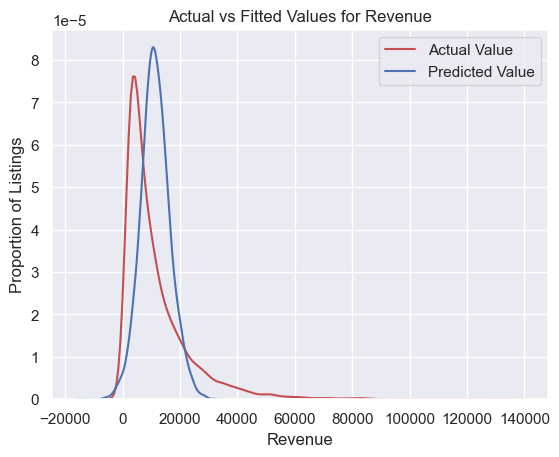

In [58]:
ax1 = sns.kdeplot(y2, color="r", label="Actual Value")
sns.kdeplot(yhat2, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Revenue')
plt.xlabel('Revenue')
plt.ylabel('Proportion of Listings')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()